In [18]:
# Data preprocessing libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
import imblearn

# Encoding data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Model
from scipy.stats import skew
import yellowbrick
import sklearn
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import RocCurveDisplay # For ROC curve
from sklearn.metrics import PrecisionRecallDisplay # For pr 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


# Config
mpl.rcParams['font.family'] = 'monospace' 
sns.set_theme(style="white", palette=None)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

sns.set(font = 'Serif', style = 'white', rc = {'axes.facecolor':'#fafafa', 'figure.facecolor':'#fafafa'})

# 1. Load data

In [19]:
#Read data
df = pd.read_csv(r'../input/heart-attack-analysis-prediction-dataset/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Description:**   
- Age : Age of the patient

- Sex : Sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- caa: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- oldpeak : ST depression induced by exercise relative to rest

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

In [20]:
# Changing the data type for the categorical variables
categorical_var = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var] = df[categorical_var].astype('category')
df.dtypes

age            int64
sex         category
cp          category
trtbps         int64
chol           int64
fbs         category
restecg     category
thalachh       int64
exng        category
oldpeak      float64
slp         category
caa         category
thall       category
output         int64
dtype: object

In [21]:
numeric_var = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial variables are : ", categorical_var)
print("The continuous variables are : ", numeric_var)
print("The target variable is :  ", target_col)

The categorial variables are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous variables are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


# 2. EDA

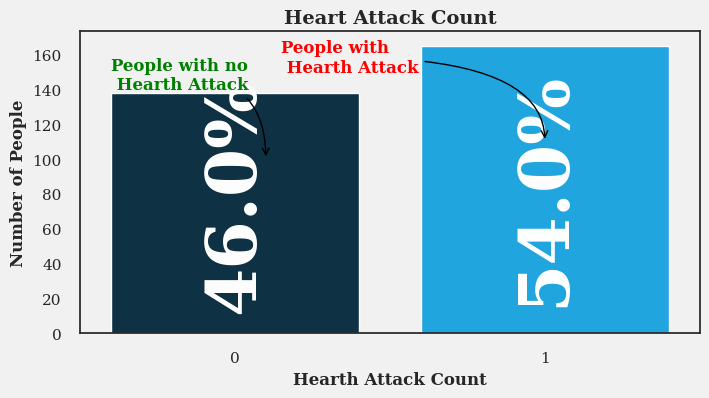

In [22]:
#Check the target
colors = ['#06344d', '#00b2ff']
sns.set(palette = colors, font = 'Serif', style = 'white', 
        rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

fig = plt.figure(figsize = (8, 4))
ax = sns.countplot(x = 'output', data = df)
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/7, 
            s = f"{np.round(i.get_height()/len(df)*100, 0)}%", 
            ha = 'center', size = 50, weight = 'bold', rotation = 90, color = 'white')
plt.title("Heart Attack Count", size = 14, weight = 'bold')
plt.annotate(text = "People with no \n Hearth Attack", xytext = (-0.4, 140), xy = (0.1, 100),
             arrowprops = dict(arrowstyle = "->", color = 'black',
                               connectionstyle = "angle3, angleA = 0, angleB = 90"
                              ), 
             color = 'green', weight = 'bold', size = 12)
plt.annotate(text = "People with \n Hearth Attack", xytext = (0.15, 150), xy = (1, 110), 
             arrowprops = dict(arrowstyle = "->", color = 'black',
                               connectionstyle = "angle3, angleA = 0, angleB = 90"
                              ), 
             color = 'red', weight = 'bold', size = 12)

plt.xlabel('Hearth Attack Count', weight = 'bold')
plt.ylabel('Number of People', weight = 'bold');

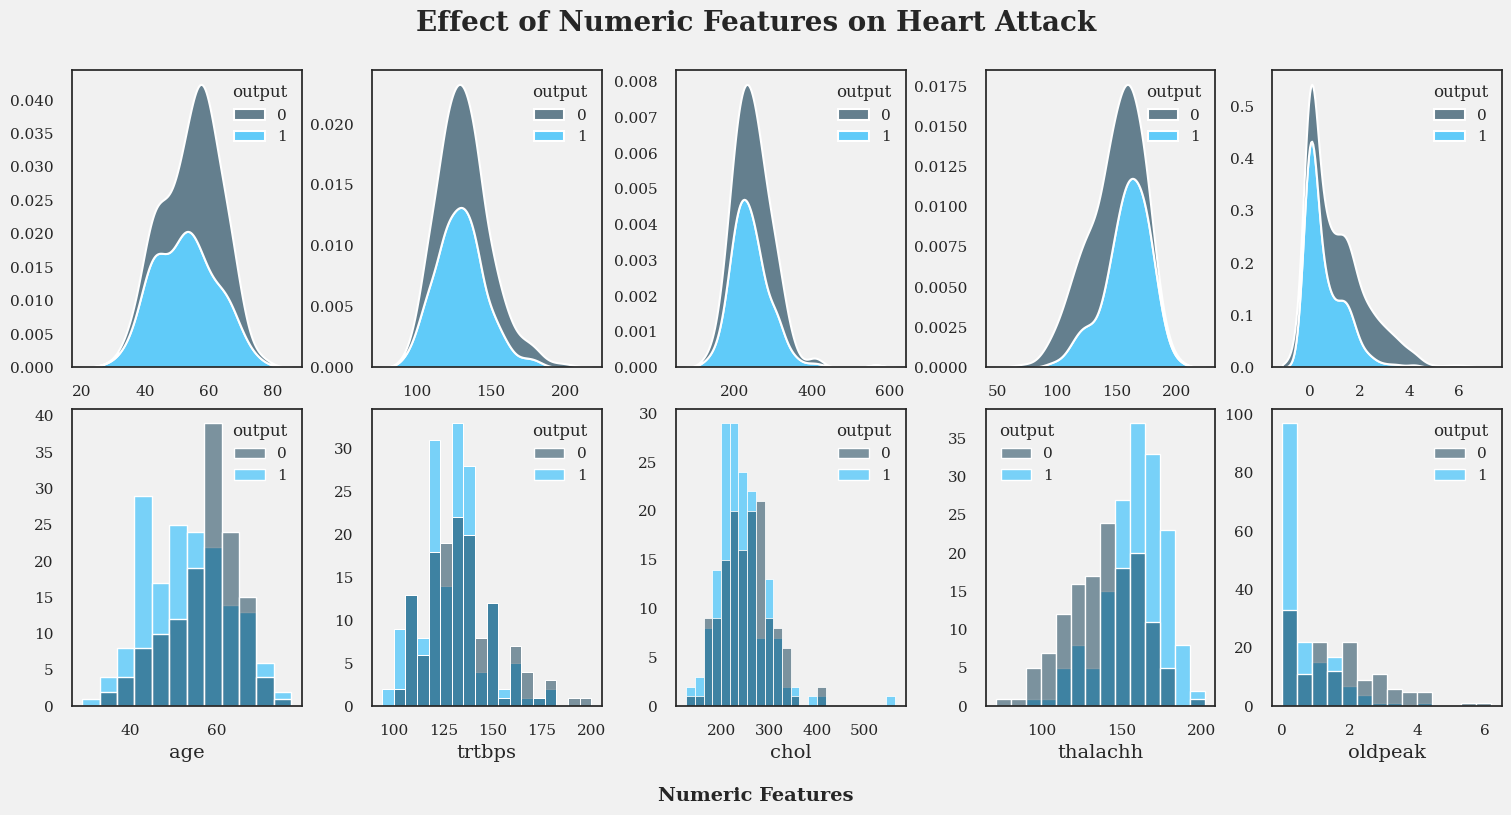

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7), constrained_layout = True) # axis.patches can't be used
# plt.suptitle('Variation of Heart Attack rate', size = 16, weight = 'bold')

for axis, num_var in zip(ax.ravel(), numeric_var): 
    sns.kdeplot(data = df, x = num_var, hue = 'output', ax = axis,
                fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5)
    axis.set_ylabel(None)
    axis.set_xlabel(None)

for i, num_var in zip(range(0, 5), numeric_var): 
    sns.histplot(data = df, x = num_var, hue = 'output', ax = ax[1][i])
    ax[1][i].set_ylabel(None)
    ax[1][i].set_xlabel(f'{num_var}', fontsize = 14)
    
fig.text(0.5, -0.05, 'Numeric Features', ha = 'center', fontsize = 14, weight = 'bold');
fig.text(0.5, 1.05, 'Effect of Numeric Features on Heart Attack', ha = 'center', fontsize = 20, weight = 'bold');

In [ ]:
fig = plt.figure(figsize=(15,8), dpi=200)

df_ = pd.melt(df, id_vars=["output"], value_vars=categorical_var)
df_ = df_.groupby(by=["output", "variable", "value"]).size()
df_ = df_.reset_index().rename(columns={0:"total"})

sns.catplot(data=df_, x="value", y="total",
            hue="output", col="variable",
            kind="bar",
            legend_out=True, col_wrap=4,
            height=4, aspect=1
           )

In [ ]:
df_corr = df[numeric_var].corr().transpose()

fig = plt.figure(figsize=(14,6))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",
         fontsize=22, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap="Blues")
plt.show()

In [ ]:
background_color = '#fafafa'
fix,ax = plt.subplots(figsize=(12,10),nrows=5,ncols=2,constrained_layout=True,dpi=150)
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
fig.set_facecolor(background_color)

for i,cons in zip(range(5), numeric_var):
    ax[i, 0].set_axis_off()
    ax[i, 0].text(0.5,0.5,"Distribution of " +cons+ "\naccording to\n target variable\n___________",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')
                   
color_palette = ['#511c00','#03ff02']        

for cons,idx in zip(numeric_var,range(5)):
    sns.kdeplot(data=df, x=cons, hue = 'output', ax = ax[idx,1],fill = True,edgecolor='black',
                 multiple = 'layer', alpha = 0.6, linewidth = 1.5, palette = color_palette)
    for edg in ['top','left','right']:
        ax[idx,1].spines[edg].set_visible(False)
    
for axes in ax.ravel():    
    axes.grid(which='major',axis='y',ls='-.')
    axes.set_ylabel('')
    axes.tick_params(axis='x',length=5,which='major')
    axes.tick_params(left=False, bottom=False)
    
# Add legend
line_labels = ["Yes", "No"]
fig.legend( labels = line_labels,   # The labels for each line
            loc = "center right", # Position of the legend
            bbox_to_anchor = (1.1, 0.5), 
            borderaxespad = 0.1,    # Small spacing around legend box
            title = "Lower happy" )  # Title for the legend

In [ ]:
df[categorical_var] = df[categorical_var].astype('int32')

background_color = '#fafafa'
fix,ax = plt.subplots(figsize=(16,22),nrows=6,ncols=3,constrained_layout=True,dpi=150)
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.5, hspace=0.5)
fig.set_facecolor(background_color)

for i in range(0,6):
    ax[i,0].set_axis_off()
    ax[i,1].set_axis_off()
    ax[i,]

# Texting the graph
ax[0,0].text(0.5,0.5,'Chest pain \ndistribution\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[1,0].text(0.5,0.5,'Number of \nmajor vessels\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[2,0].text(0.5,0.5,'Heart attack \naccording to sex\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[3,0].text(0.5,0.5,'Distribution of thall\naccording to\n target variable\n_____________________',
             horizontalalignment = 'center', verticalalignment = 'center',fontsize = 16,
             fontweight='bold',fontfamily='serif',color='#000000')

ax[4,0].text(0.5,0.5,'Boxen plot of\nthalachh wrt\n outcome\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

ax[5,0].text(0.5,0.5,'Strip plot of\nexng and age\n_____________________',horizontalalignment = 'center', 
             verticalalignment = 'center',fontsize = 16,fontweight='bold',fontfamily='serif',color='#000000')

for i in range(0,6):
    ax[i,2].tick_params(axis='x',length=5,which='major')
    ax[i,2].grid(which='major',axis='y',ls='-.')
    for edg in ['top','left','right']:
        ax[i,2].spines[edg].set_visible(False)

color_palette =['#59FF33','#ff3333']
#1        
sns.kdeplot(data=df,x='cp',hue = 'output', ax = ax[0,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[0,1].text(0.5,0.5,'0 - Typical Agina\n1 - Atypical Agina\n2 - Non-anginal pain\n3 - Asymptomatic',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#2
sns.kdeplot(data=df,x='caa',hue = 'output', ax = ax[1,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[1,1].text(0.5,0.5,'0 - Vessels\n1 - Vessels\n2 - Vessels\n3 - Vessel\n4 - Vessels ',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#3
sns.countplot(data=df, x='output', hue='sex', palette=color_palette, ax=ax[2,2])
ax[2,1].text(0.5,0.5,'0 - Male\n1 - Female ',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#4
sns.kdeplot(data=df,x='thall',hue = 'output', ax = ax[3,2],
            fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5,palette=color_palette)
ax[3,1].text(0.5,0.5,'Thalium Stress Test Result\n0, 1, 2, 3',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#5
sns.boxenplot(data=df, x='output',y='thalachh', ax=ax[4,2],color='#1166ee',palette=color_palette)
ax[4,1].text(0.5,0.5,'Maximum heart\nrate achived',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

#6
sns.stripplot(data=df, x='exng',y='age', ax=ax[5,2],color='#1166ee',palette=color_palette,hue='output')
ax[5,1].text(0.5,0.5,'Exercise induced agina\n0 - No\n1 - Yes',
             horizontalalignment = 'center',verticalalignment = 'center',fontsize = 16,fontweight='light',
             fontfamily='serif',color='#000000')

# 3. Build SVM model

**Build model to predict Heart Attack Probability**

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating a copy of df
df_train = df.copy()

# define the columns to be encoded and scaled
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns

# defining the features and target
y = df_train['output']
X = df_train.drop(['output'], axis=1)

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is",X_test.shape)
print("The shape of y_train is",y_train.shape)
print("The shape of y_test is",y_test.shape)

In [ ]:
# instantiating the object and fitting
svc = SVC(kernel='rbf', C=.1, probability=True, random_state=40)

svc.fit(X_train, y_train)

# predicting the values
y_pred = svc.predict(X_test)

# printing the test accuracy
print("SVM Classify Report\n==========================\n",
      classification_report(y_test, y_pred))

In [ ]:
df_predict_proba = X_test.copy()
y_pred_proba = svc.predict_proba(X_test)
df_predict_proba['Heart_attack_proba'] = np.round(y_pred_proba[:, 1],2)
df_predict_proba['Predict'] = y_pred
df_predict_proba['Actual'] = y_test
print('Accuracy score:', np.round(accuracy_score(y_test, y_pred), 4))
df_predict_proba

In [ ]:
df_predict_proba.to_csv('./Predict.csv')